In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import pickle


C:\Users\aman\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df_train=pd.read_csv("C:\\Users\\aman\\Downloads\\Train.csv")
df_test=pd.read_csv("C:\\Users\\aman\\Downloads\\test.csv")

In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_train.shape

(8523, 12)

In [9]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df_train.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [14]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [19]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [20]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis="columns",inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis="columns",inplace=True)

In [24]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


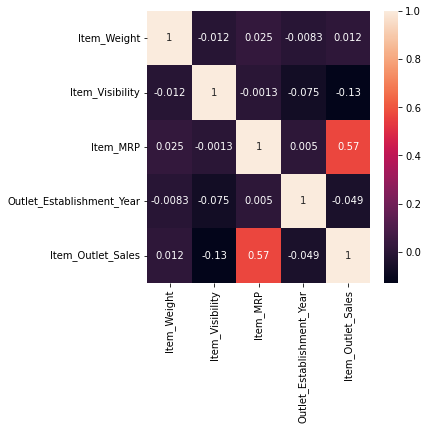

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [28]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [29]:
df_test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5681, dtype: bool

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [37]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [38]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [42]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
Y=df_train['Item_Outlet_Sales']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [44]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [45]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [46]:
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.fit_transform(X_test)

In [47]:
X_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [48]:
X_test_std

array([[-0.44354741, -0.56892467, -0.19860259, ..., -0.26815662,
         1.1067281 ,  1.07886076],
       [ 1.18274471, -0.56892467, -0.51369352, ..., -1.92470387,
         1.1067281 , -0.22387125],
       [-1.20558143,  0.99561817,  0.18237796, ...,  1.38839063,
        -1.38596862, -0.22387125],
       ...,
       [ 0.62515884, -0.56892467,  0.90184018, ..., -0.26815662,
         1.1067281 , -1.52660325],
       [ 0.97365   , -0.56892467, -1.27256346, ..., -0.26815662,
         1.1067281 ,  1.07886076],
       [-1.5447795 ,  0.99561817, -1.08005617, ..., -0.26815662,
        -0.13962026, -0.22387125]])

In [49]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [51]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [52]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [53]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,1,0.055163,8,100.3358,2009,1,2,2
8355,18.00,1,0.038979,13,148.6418,1987,0,2,1
3411,7.72,2,0.074731,1,77.5986,1997,2,0,1
7089,20.70,1,0.049035,6,39.9506,2007,1,1,1
6954,7.55,1,0.027225,3,152.9340,2002,1,1,1


In [54]:
Y_pred_lr=lr.predict(X_test_std)

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [56]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5020054018117119
885.7810720872155
1164.9965315232587


In [66]:
lr.score(X_test_std,Y_test)

0.5020054018117119

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [68]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [69]:
Y_pred_rf= rf.predict(X_test_std)

In [70]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5517328324026383
777.3576164283869
1105.301557283375


In [71]:
import joblib

In [72]:
joblib.dump(rf,"Stores sales prediction.sav")

['Stores sales prediction.sav']

In [73]:
joblib.load("Stores sales prediction.sav")

RandomForestRegressor(n_estimators=1000)